<a href="https://colab.research.google.com/github/TheAmirHK/Experiments/blob/main/GameTheory/SelfishGene_Game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In **The Selfish Gene** where *Richard Dawkins* uses game theory to explain evolutionary strategies, particularly in the context of DNA selection and behavioral evolution. Specifically, Dawkins explores the idea of Evolutionarily Stable Strategies (ESS) in one of the chapters, which is a key concept in evolutionary game theory.

### Evolutionarily Stable Strategy (ESS):
An ESS is a strategy that, if adopted by a population, cannot be invaded by any alternative strategy. It is a concept borrowed from game theory and applied to evolutionary biology to explain how certain behaviors or traits become stable in a population.

## Key Features of ESS:
**Stability**: Once an ESS is established in a population, no mutant strategy can outperform it.

**Nash Equilibrium Analogy**: An ESS is similar to a Nash Equilibrium in game theory, where no player can benefit by unilaterally changing their strategy.

Frequency-Dependent Selection: The success of a strategy depends on how common it is in the population.

## Example in The Selfish Gene:
Dawkins uses the Hawk-Dove game to illustrate ESS. This game models conflicts between individuals over resources (e.g., food, mates, territory).

Rules of the Hawk-Dove Game:
  - Hawk Strategy: Fight aggressively until you win or get injured.

  - Dove Strategy: Display aggression but retreat if the opponent escalates.

Payoffs:
  - Hawk vs. Hawk: One wins, the other gets injured. Average payoff is negative due to the cost of injury.

  - Hawk vs. Dove: Hawk wins the resource, Dove retreats.

  - Dove vs. Dove: Both share the resource peacefully.

ESS in the Hawk-Dove Game:
  - If the population is mostly Hawks, Doves can invade because they avoid injury.

  - If the population is mostly Doves, Hawks can invade because they dominate resources.

The ESS is a mixed strategy where the proportion of Hawks and Doves reaches a stable equilibrium.

# Key Equations

### 1. Fitness of Hawks

$W_H = p \cdot \frac{V - C}{2} + (1 - p) \cdot V$

### 2. Fitness of Doves

$W_D = p \cdot 0 + (1 - p) \cdot \frac{V}{2}$

### 3. Replicator Dynamics

$\frac{dp}{dt} = p \cdot (1 - p) \cdot (W_H - W_D)$

### 4. ESS Condition
- If $ V > C $, ESS is $ p = 1 $ (all Hawks).
- If $ V < C $, ESS is $ p^* = \frac{V}{C} $ (mixed strategy).



In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Columns: Hawk, Dove
V = 6  # Value of the resource
C = 9  # Cost of fighting
payoff_matrix = np.array([
    [(V - C) / 2, V],  # Hawk vs Hawk, Hawk vs Dove
    [0, V / 2]         # Dove vs Hawk, Dove vs Dove
])


In [2]:
population_size = 1000
generations = 1000
initial_hawk_ratio = 0.2  # Initial proportion of Hawks in the population
population = np.random.choice(['Hawk', 'Dove'], size=population_size, p=[initial_hawk_ratio, 1 - initial_hawk_ratio])

In [3]:
def calculate_fitness(strategy, opponent_strategy):
    if strategy == 'Hawk' and opponent_strategy == 'Hawk':
        return (V - C) / 2
    elif strategy == 'Hawk' and opponent_strategy == 'Dove':
        return V
    elif strategy == 'Dove' and opponent_strategy == 'Hawk':
        return 0
    elif strategy == 'Dove' and opponent_strategy == 'Dove':
        return V / 2

In [4]:
hawk_ratios = []

for generation in range(generations):
    # Calculate fitness for each individual
    fitness = np.zeros(population_size)
    for i in range(population_size):
        for j in range(population_size):
            if i != j:
                fitness[i] += calculate_fitness(population[i], population[j])

    # Normalize fitness to get probabilities
    fitness = np.maximum(fitness, 0)
    fitness_sum = np.sum(fitness)
    if fitness_sum > 0:
        fitness /= fitness_sum
    else:
        fitness = np.ones(population_size) / population_size

    # Create next generation based on fitness
    new_population = np.random.choice(population, size=population_size, p=fitness)
    population = new_population

    # Record the proportion of Hawks
    hawk_ratio = np.sum(population == 'Hawk') / population_size
    hawk_ratios.append(hawk_ratio)

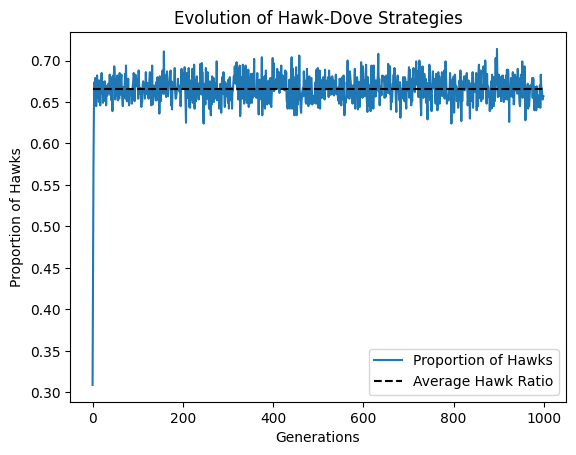

In [5]:
plt.plot(range(generations), hawk_ratios, label='Proportion of Hawks')
plt.plot(range(generations), [np.mean(hawk_ratios)] * generations,'k--', label='Average Hawk Ratio') #Plot average hawk ratio
plt.xlabel('Generations')
plt.ylabel('Proportion of Hawks')
plt.title('Evolution of Hawk-Dove Strategies')
plt.legend()
plt.show()